In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

from core.features import Features
from core.preproccesing import normalization, dims_reduction, split_by_blocks
from core.visualization import plot_pca

from core.measurement import (
    Unattacked, 
    LO_Intesity_Attack,
    Calibration_Attack,
    Saturation_Attack,
    Hybrid_Attack,
    Hybrid_Attack2
    )
from core.constants import (
    ATTENUATION_VALUES,
    NUM_SAMPLES,
    NUM_BLOCKS,
    SHOT_NOISE as N0,
)

In [35]:
attenuation_coefs = np.array(ATTENUATION_VALUES)
samples = np.array([int(NUM_SAMPLES * 0.9), int(NUM_SAMPLES * 0.1)])


print(f'ATTENUATION_VALUES: {attenuation_coefs} \t SAMPLES: {samples}')

ATTENUATION_VALUES: [1.    0.001] 	 SAMPLES: [9000000 1000000]


In [36]:
y_unattacked = Unattacked(attenuation_coefs=attenuation_coefs, samples=samples).quadrature_values()

blocks_unattacked = split_by_blocks(y_unattacked, NUM_BLOCKS)

features_unattacked = Features(blocks_unattacked).generate()

features_unattacked

array([[-1.27690058e-02,  1.02659893e+00,  1.00272182e+07,
         3.87033659e-01],
       [-2.24100559e-02,  1.02092049e+00,  1.00273466e+07,
         3.88762033e-01],
       [-3.60892427e-03,  1.00632787e+00,  9.89661024e+06,
         4.08643201e-01],
       ...,
       [-1.46910255e-02,  1.03309736e+00,  1.00120560e+07,
         4.00315311e-01],
       [ 1.24402530e-02,  1.01972762e+00,  1.00402281e+07,
         3.66633519e-01],
       [-1.41862775e-02,  9.87465530e-01,  1.01259825e+07,
         3.83542409e-01]])

In [37]:
k_loia = 0.95

y_LOIA = LO_Intesity_Attack(attenuation_coefs=attenuation_coefs, samples=samples, k_loia=k_loia).quadrature_values()

blocks_unattacked = split_by_blocks(y_LOIA, NUM_BLOCKS)

features_LOIA = Features(blocks_unattacked, k_loia, k_loia).generate()

features_LOIA

array([[1.84972600e-03, 9.82155956e-01, 9.44641007e+06, 3.76667649e-01],
       [1.57521111e-02, 9.85899298e-01, 9.55513434e+06, 3.84149327e-01],
       [1.26823142e-02, 9.97961135e-01, 9.52750444e+06, 3.72632277e-01],
       ...,
       [1.03405941e-02, 9.71672917e-01, 9.46113255e+06, 3.71255272e-01],
       [2.23551951e-03, 1.00015834e+00, 9.47138997e+06, 3.53453885e-01],
       [3.99133496e-03, 9.89221642e-01, 9.56954479e+06, 3.72030332e-01]])

In [38]:
k_calib = 1

y_calib = Calibration_Attack(attenuation_coefs=attenuation_coefs, samples=samples, k_calib=k_calib).quadrature_values()

blocks_calib = split_by_blocks(y_calib, NUM_BLOCKS)

features_calib = Features(blocks_calib, k_calib).generate()

features_calib

array([[ 6.14496694e-03,  8.82009344e-01,  9.99163863e+06,
         2.97708524e-01],
       [-4.30583652e-03,  8.53310071e-01,  1.00763631e+07,
         2.63282578e-01],
       [-1.95302412e-03,  8.70711574e-01,  9.90568422e+06,
         2.99173845e-01],
       ...,
       [-1.52313736e-02,  8.66271269e-01,  9.91462513e+06,
         3.09062994e-01],
       [ 5.97080631e-03,  8.60982264e-01,  9.92533075e+06,
         2.89946013e-01],
       [ 1.41186657e-02,  8.68256097e-01,  1.01950912e+07,
         2.91247328e-01]])

In [39]:
a_sat = 20 * math.sqrt(N0)
delta_sat = 19.5 * math.sqrt(N0)

y_sat = Saturation_Attack(attenuation_coefs=attenuation_coefs,samples=samples, alpha_sat=a_sat, delta=delta_sat).quadrature_values()

blocks_sat = split_by_blocks(y_sat, NUM_BLOCKS)

features_sat = Features(blocks_sat).generate()

features_sat

array([[1.20529444e+01, 5.44120142e-01, 1.00366330e+07, 2.14664246e-01],
       [1.20612783e+01, 5.27038953e-01, 9.85282929e+06, 2.37527147e-01],
       [1.20504016e+01, 5.24076306e-01, 9.97635143e+06, 2.10661526e-01],
       ...,
       [1.20399882e+01, 5.27072383e-01, 9.92631483e+06, 2.38956795e-01],
       [1.20609301e+01, 5.17841026e-01, 9.95918629e+06, 2.07192765e-01],
       [1.20410088e+01, 5.14650336e-01, 9.97438432e+06, 2.15325694e-01]])

In [40]:
hyb1_m = Hybrid_Attack(attenuation_coefs=attenuation_coefs,samples=samples)

hyb1_coef = math.sqrt(1 / hyb1_m.find_params()[1])
y_hyb1 = hyb1_m.quadrature_values()

blocks_hyb1 = split_by_blocks(y_hyb1, NUM_BLOCKS)
print(hyb1_coef)
features_hyb1 = Features(blocks_hyb1, hyb1_coef).generate() # +0.005

features_hyb1

1.0000000155018527


array([[-2.24718108e-02,  1.14385997e+00,  1.00482187e+07,
         3.88731578e-01],
       [ 1.48055262e-02,  1.13526117e+00,  1.00976941e+07,
         4.49683351e-01],
       [ 8.97274685e-03,  1.12332320e+00,  1.00559301e+07,
         3.71836892e-01],
       ...,
       [ 5.87292363e-03,  1.15545134e+00,  1.00919226e+07,
         3.86677812e-01],
       [-2.13146930e-02,  1.13255908e+00,  9.99334203e+06,
         4.01596627e-01],
       [-1.11401602e-02,  1.12705732e+00,  1.01434799e+07,
         3.72963551e-01]])

In [41]:
y_hyb2 = Hybrid_Attack2(attenuation_coefs=attenuation_coefs,samples=samples).quadrature_values()

blocks_hyb2 = split_by_blocks(y_hyb2, NUM_BLOCKS)

features_hyb2 = Features(blocks_hyb2).generate()

features_hyb2

array([[-5.38328713e+01,  1.90431045e+01,  9.93582695e+06,
         4.38004646e-01],
       [-5.38630824e+01,  1.95810319e+01,  9.87755400e+06,
         3.74276966e-01],
       [-5.39445112e+01,  1.85011632e+01,  1.00995389e+07,
         4.14316713e-01],
       ...,
       [-5.38898809e+01,  1.92115982e+01,  9.87155466e+06,
         4.25853002e-01],
       [-5.39624345e+01,  1.93815482e+01,  9.90414913e+06,
         3.81328121e-01],
       [-5.38976568e+01,  1.93792410e+01,  9.82586357e+06,
         4.40564223e-01]])

In [42]:
features = ['mean', 'var', 'intensity_lo', 'shot_noise']
labels = ['Без атак', 'ИЛО', 'Калиб.', 'Насыщ.', 'Волн.', 'Ослеп.'] # 

data = np.concatenate([features_unattacked, features_LOIA, features_calib, features_sat, features_hyb1, features_hyb2]) 
data_normalized = normalization(data)

df = pd.DataFrame(data=data_normalized, columns=features)
df['Атака'] = np.repeat(labels, NUM_BLOCKS)
df.loc[df['Атака'] == 'Без атак']

,mean,var,intensity_lo,shot_noise,Атака
0,0.324706,-0.429010,0.521558,0.469182,Без атак
1,0.324256,-0.429842,0.522167,0.493030,Без атак
2,0.325133,-0.431979,-0.098443,0.767338,Без атак
3,0.324505,-0.432424,0.040139,1.015668,Без атак
4,0.325451,-0.429085,-0.488336,0.381056,Без атак
...,...,...,...,...,...
995,0.324810,-0.429701,0.773513,0.394474,Без атак
996,0.325192,-0.434894,0.481959,0.580857,Без атак
997,0.324616,-0.428059,0.449582,0.652435,Без атак
998,0.325882,-0.430017,0.583316,0.187713,Без атак


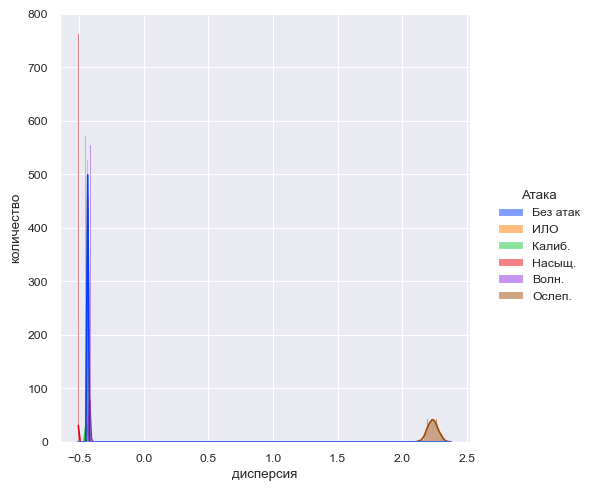

In [43]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")
# g = sns.FacetGrid(df, col='target')
# g.map(sns.histplot, "var")
g = sns.displot(data=df, x='var', hue='Атака', kde=True, palette="bright", legend=True)
g.set_axis_labels('дисперсия', 'количество')


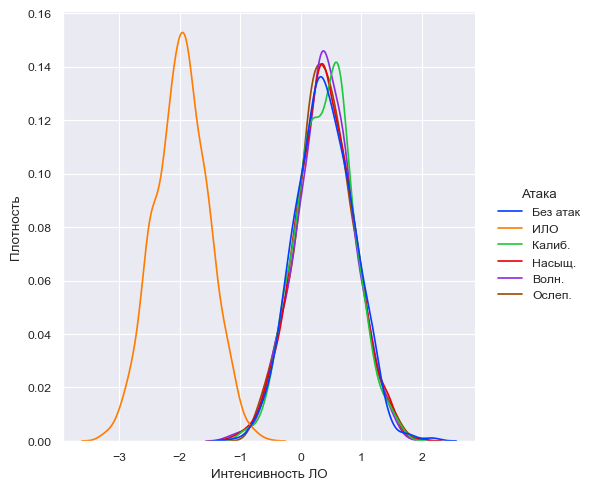

In [44]:
g = sns.displot(data=df, x='intensity_lo', hue='Атака', kind='kde', palette="bright",legend=True)
g.set_axis_labels('Интенсивность ЛО', 'Плотность')

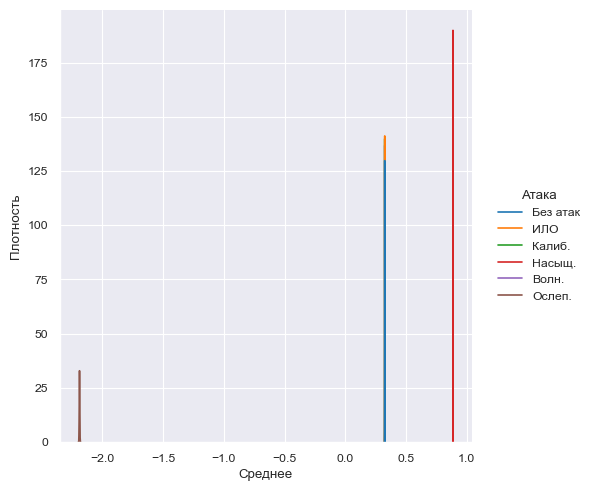

In [45]:
g = sns.displot(data=df, x='mean', hue='Атака', kind='kde', palette="tab10", legend=True)
g.set_axis_labels('Cреднее', 'Плотность')

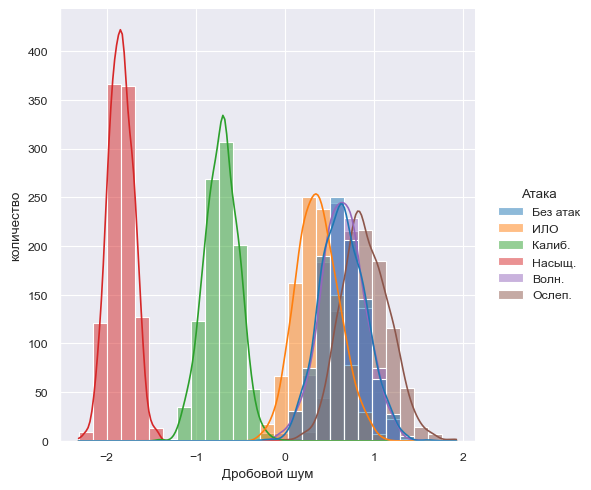

In [46]:

g = sns.displot(data=df, x='shot_noise', hue='Атака', kde=True, palette="tab10", legend=True)
g.set_axis_labels('Дробовой шум', 'количество')


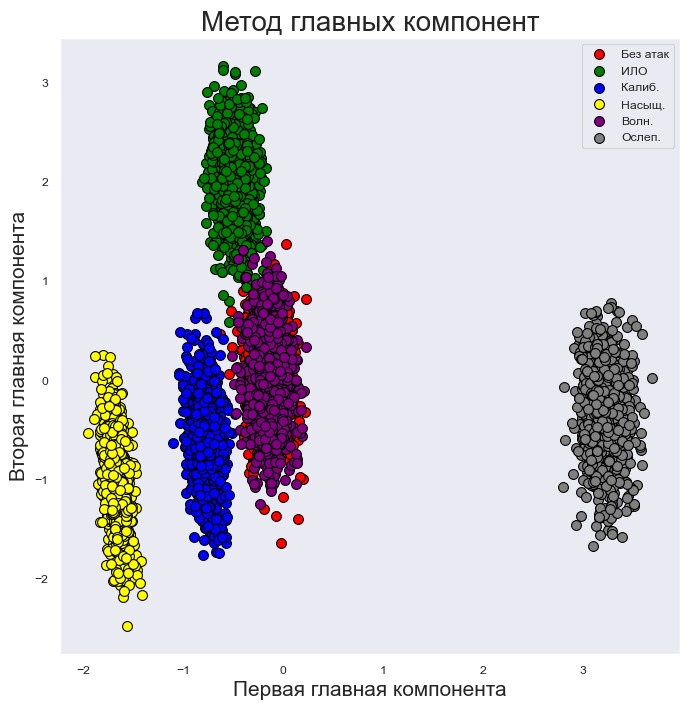

In [47]:
pca_df = dims_reduction(df=df, features=features, dims=2)
plot_pca(pca_df=pca_df, labels=labels)

In [48]:
from sklearn.model_selection import train_test_split

X = df.loc[:, features].values
y = df.loc[:,['Атака']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

print(f"Размер обучающей выборки: {X_train.shape}, размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (4200, 4), размер тестовой выборки: (1800, 4)


In [49]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [50]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Наивный Байесовский классификатор")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Наивный Байесовский классификатор
Accuracy: 0.9988888888888889
F1 Score: 0.9988888888888889


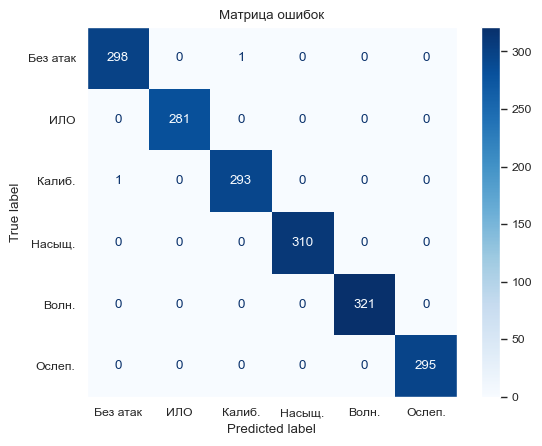

In [51]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=0)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=knn_predictions)
f1 = f1_score(y_pred=knn_predictions, y_true=y_test, average="weighted")

print("K ближайших соседей")
print(f'Accuracy: {accuracy}')
print("F1 Score:", f1)

K ближайших соседей
Accuracy: 0.8566666666666667
F1 Score: 0.8564522435485871


c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


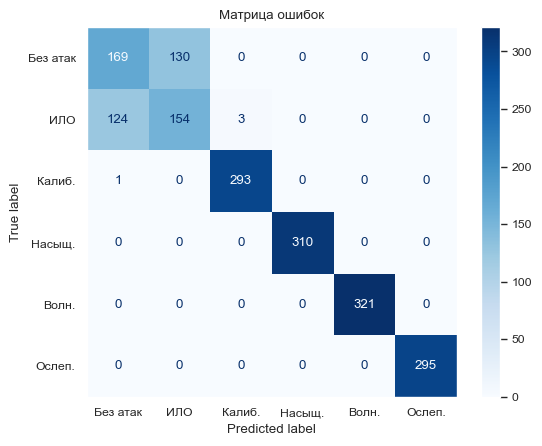

In [53]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=0)

cm = confusion_matrix(y_test, knn_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

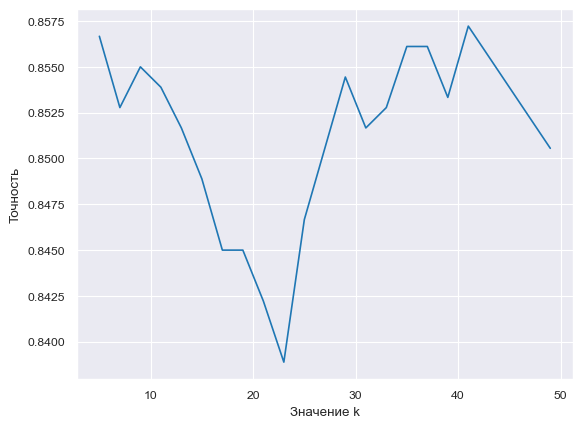

In [54]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# диапазон значений k
k_values = range(5, 51, 2) 

data = {'k': [], 'accuracy': []}

for k in k_values:
    # Создайте модель k-ближайших соседей с текущим значением k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    knn_predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, knn_predictions)
    data['k'].append(k)
    data['accuracy'].append(accuracy)


df_k = pd.DataFrame(data)

# график зависимости точности от значения k 
sns.lineplot(data=df_k, x='k', y='accuracy')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

In [55]:
print(data)

{'k': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'accuracy': [0.8566666666666667, 0.8527777777777777, 0.855, 0.8538888888888889, 0.8516666666666667, 0.8488888888888889, 0.845, 0.845, 0.8422222222222222, 0.8388888888888889, 0.8466666666666667, 0.8505555555555555, 0.8544444444444445, 0.8516666666666667, 0.8527777777777777, 0.8561111111111112, 0.8561111111111112, 0.8533333333333334, 0.8572222222222222, 0.8555555555555555, 0.8538888888888889, 0.8522222222222222, 0.8505555555555555]}


In [56]:
df

,mean,var,intensity_lo,shot_noise,Атака
0,0.324706,-0.429010,0.521558,0.469182,Без атак
1,0.324256,-0.429842,0.522167,0.493030,Без атак
2,0.325133,-0.431979,-0.098443,0.767338,Без атак
3,0.324505,-0.432424,0.040139,1.015668,Без атак
4,0.325451,-0.429085,-0.488336,0.381056,Без атак
...,...,...,...,...,...
5995,-2.190703,2.258118,0.913699,1.291726,Ослеп.
5996,-2.189401,2.205725,0.176344,0.613506,Ослеп.
5997,-2.188524,2.234436,-0.217382,1.004789,Ослеп.
5998,-2.191908,2.259327,-0.062655,0.390461,Ослеп.


In [57]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

num_classes = 6
encoder = LabelBinarizer()

X = df.drop(['Атака'], axis=1)  # Признаки
y = df['Атака']
y = encoder.fit_transform(y)
y_int = np.argmax(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=41)


model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],)),
    Dense(16, activation='tanh'),
    Dense(6, activation='softmax')  # 6 выходных нейронов для 6 классов
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

C:\Users\Loassar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4385 - loss: 1.4706 - val_accuracy: 0.6992 - val_loss: 0.7548
Epoch 2/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7341 - loss: 0.6683 - val_accuracy: 0.8258 - val_loss: 0.4972
Epoch 3/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4667 - val_accuracy: 0.8383 - val_loss: 0.3879
Epoch 4/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.3765 - val_accuracy: 0.8408 - val_loss: 0.3296
Epoch 5/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8335 - loss: 0.3239 - val_accuracy: 0.8467 - val_loss: 0.2963
Epoch 6/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8424 - loss: 0.2934 - val_accuracy: 0.8442 - val_loss: 0.2764
Epoch 7/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8238 - loss: 0.2860 - val_accuracy: 0.8475 - val_loss: 0.2641
Epoch 8/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.2736 - val_accuracy: 0.

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность модели: {test_accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8923 - loss: 0.2151
Точность модели: 0.8941666483879089


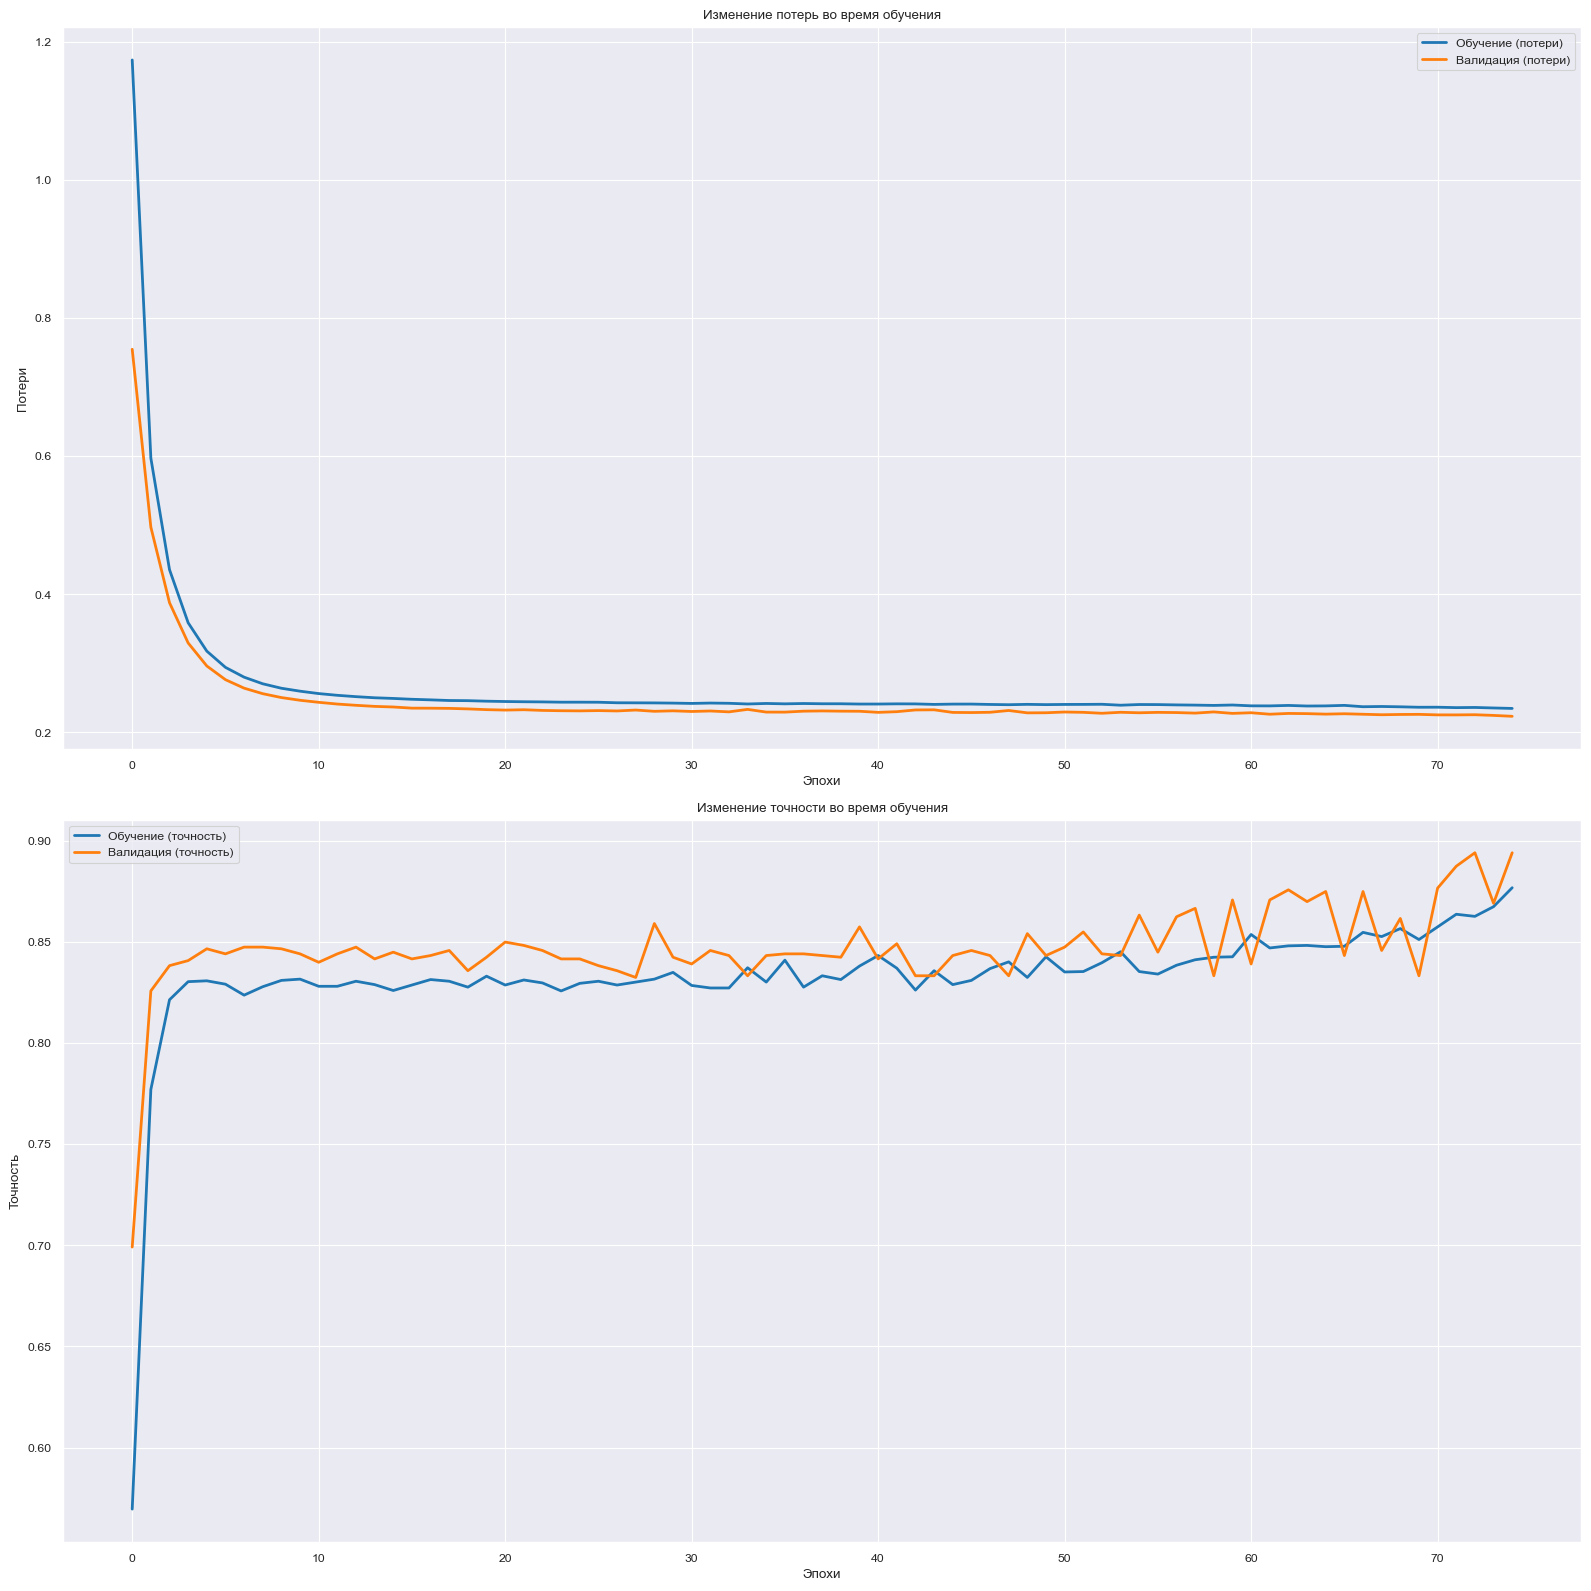

In [59]:
# Визуализация потерь и точности
plt.figure(figsize=(16, 8 * 2))

# График потерь
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Обучение (потери)', linewidth=2)
plt.plot(history.history['val_loss'], label='Валидация (потери)', linewidth=2)
plt.title('Изменение потерь во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

# График точности
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Обучение (точность)', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Валидация (точность)', linewidth=2)
plt.title('Изменение точности во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


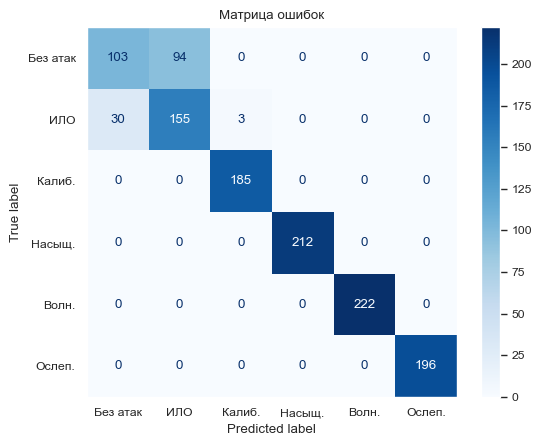

In [60]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

# предсказания на тестовом наборе
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()